In [1]:
import EIS
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [2]:
S1t=EIS.EIS_tblm(path=r"LLO_1c_1nM LLO 30min.txt")  #read file and initialize object
S1n=EIS.EIS_tblm(path=r"LLO_1c_dopc-chol 50-50_initial.txt")
S1t.fit() #fit spectrum
S1n.fit()

print("Rohm=",S1t.solution.x[0],"CPE_mem=",S1t.solution.x[1],"CPE_def=",S1t.solution.x[2],"n_mem=",S1t.solution.x[3],"n_def=",S1t.solution.x[4],"R_def",S1t.solution.x[5],"C_stray",S1t.solution.x[6])

print("______________________________________________________")

print("Rohm=",S1n.solution.x[0],"CPE_mem=",S1n.solution.x[1],"CPE_def=",S1n.solution.x[2],"n_mem=",S1n.solution.x[3],"n_def=",S1n.solution.x[4],"R_def",S1n.solution.x[5],"C_stray",S1n.solution.x[6])


Rohm= 33.076204482589986 CPE_mem= 7.157019000210575e-07 CPE_def= 5.061880894059252e-06 n_mem= 2280.379549523875 n_def= 0.9442400791580217 R_def 0.9216048887861935 C_stray 4.888264724688759e-13
______________________________________________________
Rohm= 35.981955047761986 CPE_mem= 4.399957527566413e-07 CPE_def= 4.584885369682806e-06 n_mem= 99947.92544257344 n_def= 0.9879025127890143 R_def 0.6205202049354543 C_stray 9.980278972913564e-10


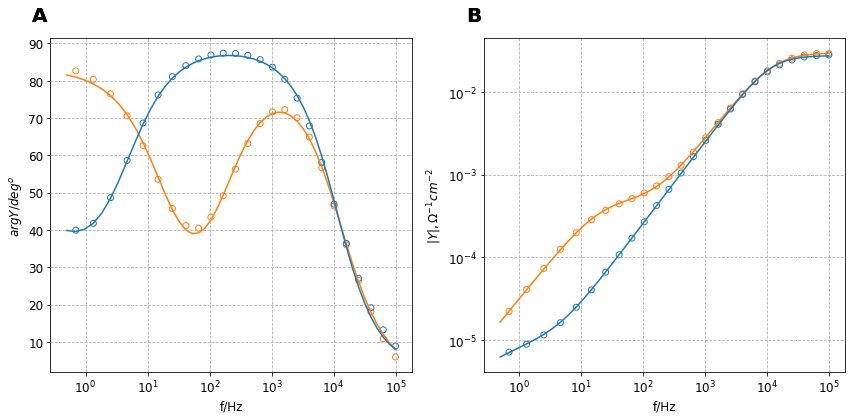

In [3]:
fig, axs =plt.subplots(1,2,figsize=(12,6))
S1t.plot(axs,["phase","magnitude"],compensate=False,color='C1') #EIS_tblm.plot plots fitted result
S1t.scatter(axs,["phase","magnitude"],compensate=False,facecolor='none',edgecolor='C1') #EIS_tblm.scatter plots experimental data
S1n.plot(axs,["phase","magnitude"],compensate=False,color='C0') 
S1n.scatter(axs,["phase","magnitude"],compensate=False,facecolor='none',edgecolor='C0') 
fig.tight_layout()
plt.show()

Ohmic resistance and parasitic capacitance can be removed by passing parameter compensate as True (default is Fasle). Doesn't work with other equivalent circuits.

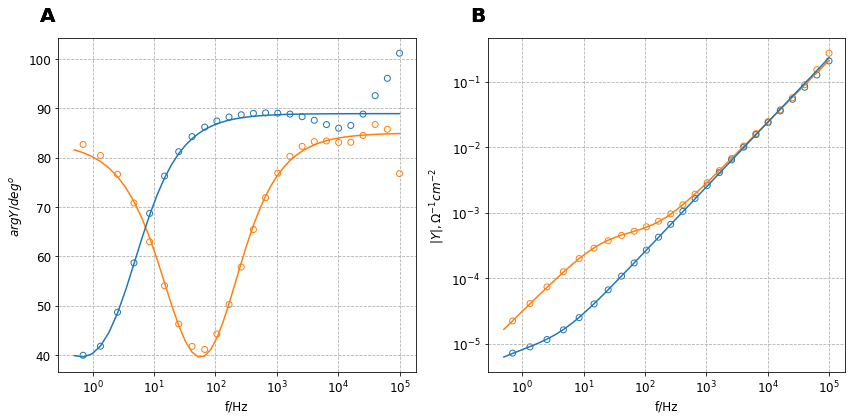

In [4]:
fig, axs =plt.subplots(1,2,figsize=(12,6))
S1t.plot(axs,["phase","magnitude"],compensate=True,color='C1')
S1t.scatter(axs,["phase","magnitude"],compensate=True,facecolor='none',edgecolor='C1')
S1n.plot(axs,["phase","magnitude"],compensate=True,color='C0')
S1n.scatter(axs,["phase","magnitude"],compensate=True,facecolor='none',edgecolor='C0')
fig.tight_layout()
plt.show()

Fitting with other equivalent circuit can be achivied by first defining apropriate function. Below is example circuit function for self assembled monolayer:

In [5]:
def SAM_circuit(f,pars):
    # Rohm, Q_sam, n_sam,C_stray = pars
    omega=2*np.pi*f  
    Rohm=pars[0]                               #Ohmic resistance
    Z_CPE_sam=1/(pars[1]*(omega*1j)**pars[2])  #CPE impedance (in series with Rohm)
    Z_C_stray=1/(omega*pars[3]*1j)             #Impednace of stray capacitance (paralel to Rohm)
    Ztot=(1/Rohm+1/Z_C_stray)**-1   +   Z_CPE_sam
    return Ztot  



Since all default values are prepared for tBLM curucit, new values for boundaries and Intitial_guess shold be provided. Also Area should be modifed to area of electrode.

In [6]:
#             Rohm,    CPE_sam     ,n_sam ,C_stray = pars
guess=np.array([50,3.66057165e-06,0.95  ,3.53851916e-10])
bounds=np.transpose([[10,2*10**-6,0.5,10**-14],[300,2*10**-5,1,10**-9]])
C=EIS.EIS_tblm(Initial_guess=guess,Circuit=SAM_circuit,bounds=bounds,path=r"sam_wc30_1_20140122z.txt",Area=0.32)
C.fit()
print("R_ohm=",C.solution.x[0],"CPE_sam=",C.solution.x[1],"n_sam=",C.solution.x[2],"C_stray=",C.solution.x[3])


R_ohm= 24.322180580472036 CPE_sam= 7.226449548386032e-06 n_sam= 0.992295713205074 C_stray= 1.0352781203934392e-10


Other plotting examples bellow

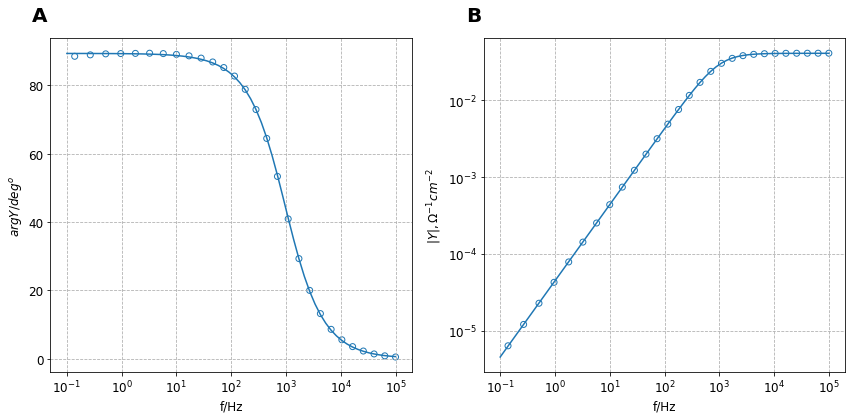

In [7]:
#bode diagram of SAM spectra
fig, axs =plt.subplots(1,2,figsize=(12,6))
C.plot(axs,["phase","magnitude"],color='C0') #axs should be flattened np.array
C.scatter(axs,["phase","magnitude"],facecolor='none',edgecolor='C0')
fig.tight_layout()
plt.show()

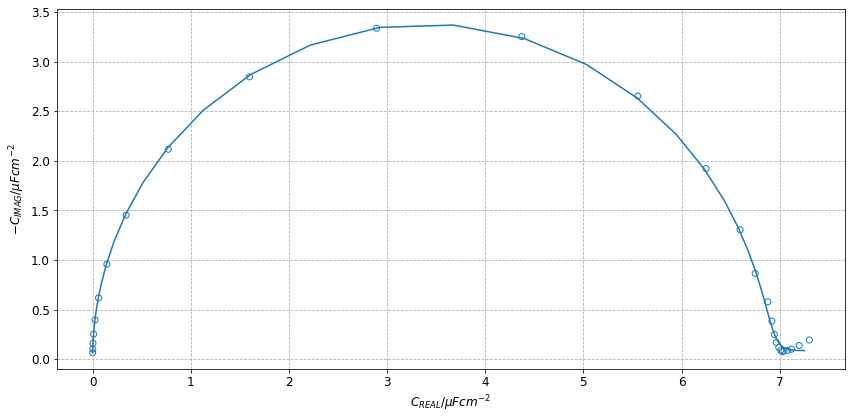

In [8]:
#ColeCole plot of SAM spectra
fig, axs =plt.subplots(1,1,figsize=(12,6))
C.plot(axs,"ColeCole",color='C0')
C.scatter(axs,"ColeCole",facecolor='none',edgecolor='C0')
fig.tight_layout()
plt.show()

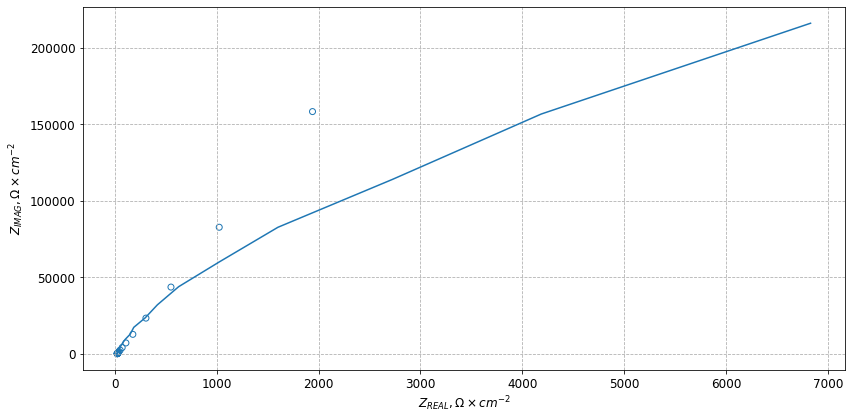

In [9]:
#Nyquist plot of SAM spectra
fig, axs =plt.subplots(1,1,figsize=(12,6))
C.plot(axs,"Nyquist",color='C0')
C.scatter(axs,"Nyquist",facecolor='none',edgecolor='C0')
fig.tight_layout()
plt.show()

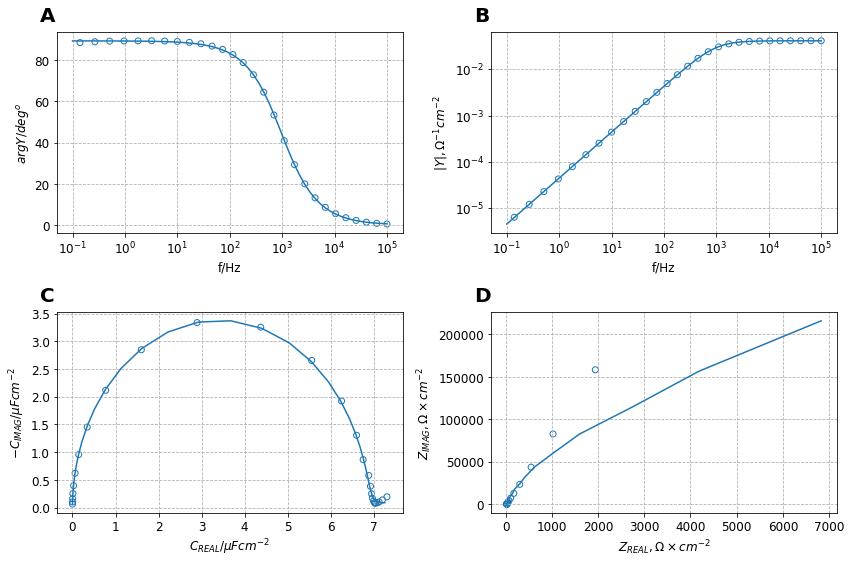

In [10]:
# all in one

fig=plt.figure(figsize=(12,8))
gs=GridSpec(2,2) # 2 rows, 3 columns

ax1=fig.add_subplot(gs[0,0]) # First row, first column
ax2=fig.add_subplot(gs[0,1]) # First row, second column
ax3=fig.add_subplot(gs[1,0]) # Second row, first columns
ax4=fig.add_subplot(gs[1,1]) # Second row, second column
axs=np.array([ax1,ax2,ax3,ax4])

C.plot(axs,["phase","magnitude","ColeCole","Nyquist"],compensate=False,color='C0')
C.scatter(axs,["phase","magnitude","ColeCole","Nyquist"],compensate=False,facecolor='none',edgecolor='C0')
fig.tight_layout()

plt.show()